In [1]:
!pip install pandas matplotlib seaborn


Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display plots in the notebook
%matplotlib inline


In [4]:
df = pd.read_csv('owid-covid-data.csv')
df.head()


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60457 entries, 0 to 60456
Data columns (total 67 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   iso_code                                    60457 non-null  object 
 1   continent                                   57099 non-null  object 
 2   location                                    60457 non-null  object 
 3   date                                        60457 non-null  object 
 4   total_cases                                 60443 non-null  float64
 5   new_cases                                   60441 non-null  float64
 6   new_cases_smoothed                          60256 non-null  float64
 7   total_deaths                                60442 non-null  float64
 8   new_deaths                                  60440 non-null  float64
 9   new_deaths_smoothed                         60255 non-null  float64
 10  total_case

In [6]:
df.isnull().sum().sort_values(ascending=False).head(10)


weekly_icu_admissions_per_million          60457
weekly_icu_admissions                      60457
weekly_hosp_admissions_per_million         59254
weekly_hosp_admissions                     59254
excess_mortality_cumulative_per_million    58984
excess_mortality                           58984
excess_mortality_cumulative                58984
excess_mortality_cumulative_absolute       58984
hosp_patients_per_million                  56003
hosp_patients                              56003
dtype: int64

In [16]:
df['location'].unique()


array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa',
       'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Asia', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia'], dtype=object)

In [17]:
countries = ['Brazil', 'Bangladesh', 'Austria']
df_countries = df[df['location'].isin(countries)].copy()
df_countries['date'] = pd.to_datetime(df_countries['date'])


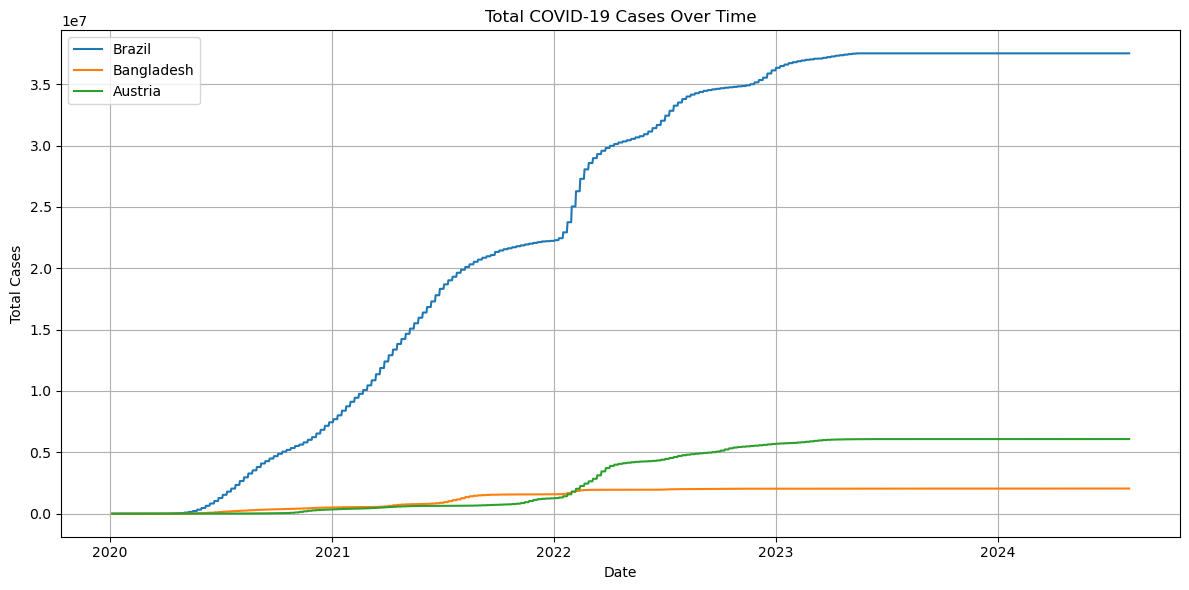

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for country in countries:
    country_data = df_countries[df_countries['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)

plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


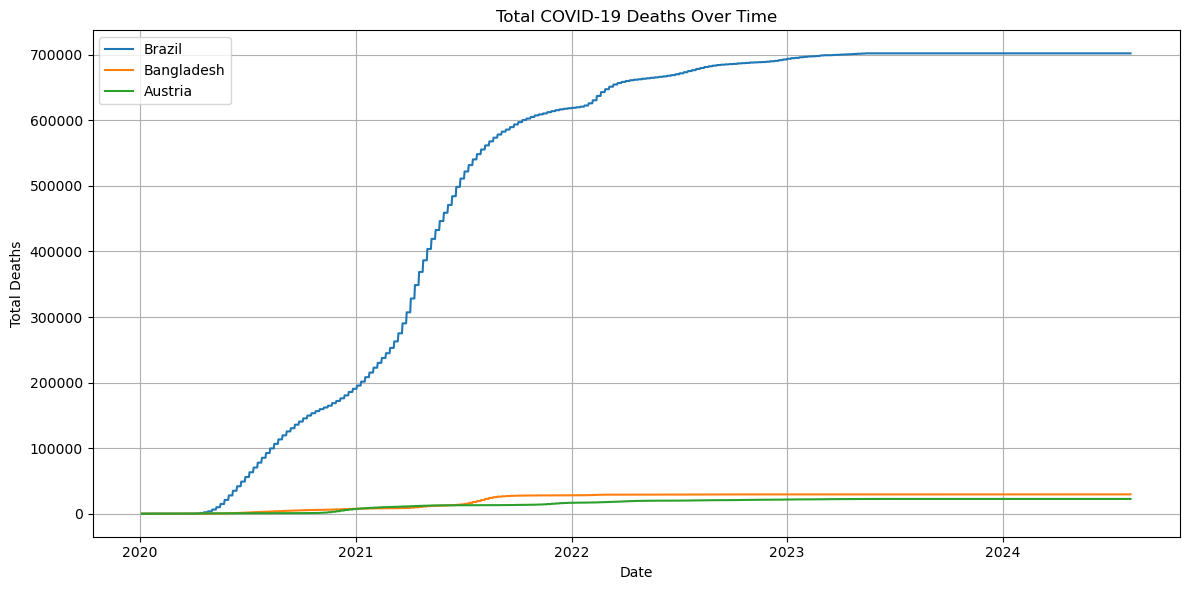

In [19]:
#Total Deaths Over Time
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = df_countries[df_countries['location'] == country]
    plt.plot(country_data['date'], country_data['total_deaths'], label=country)

plt.title('Total COVID-19 Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


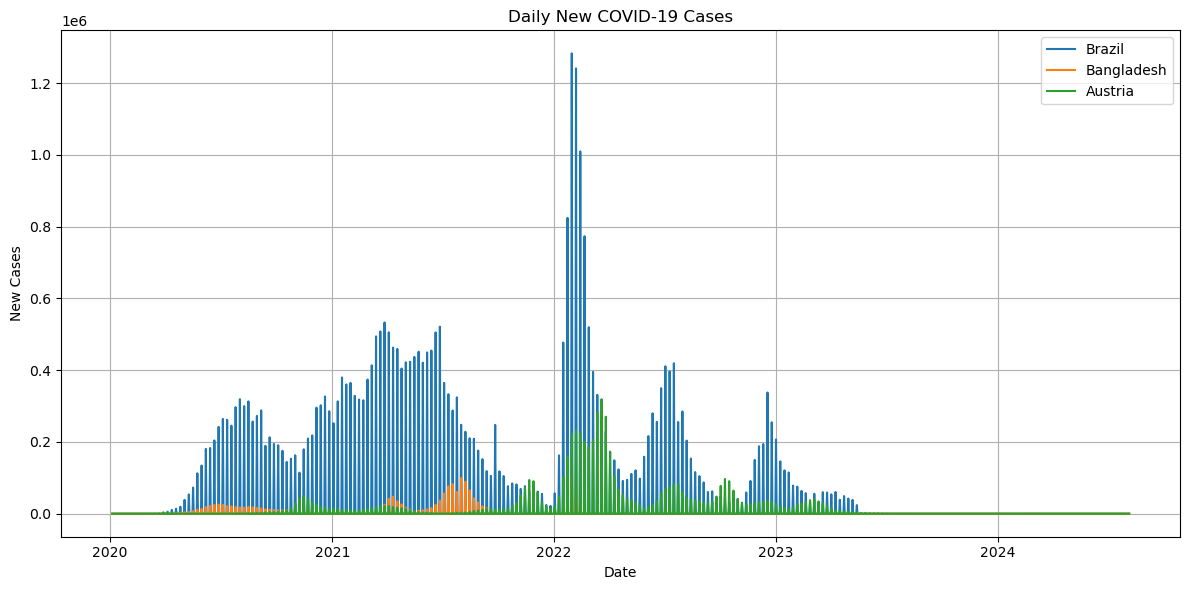

In [20]:
#Compare Daily New Cases Across Countries
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = df_countries[df_countries['location'] == country]
    plt.plot(country_data['date'], country_data['new_cases'], label=country)

plt.title('Daily New COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


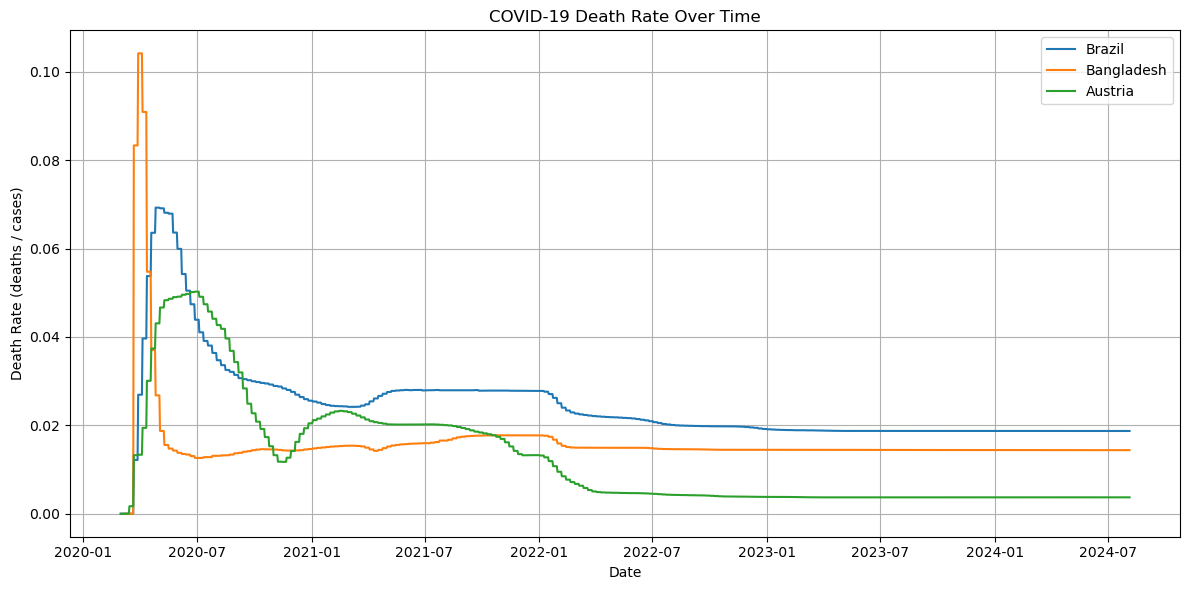

In [21]:
#Calculate and Plot Death Rate Over Time
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = df_countries[df_countries['location'] == country].copy()
    country_data['death_rate'] = country_data['total_deaths'] / country_data['total_cases']
    plt.plot(country_data['date'], country_data['death_rate'], label=country)

plt.title('COVID-19 Death Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Death Rate (deaths / cases)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


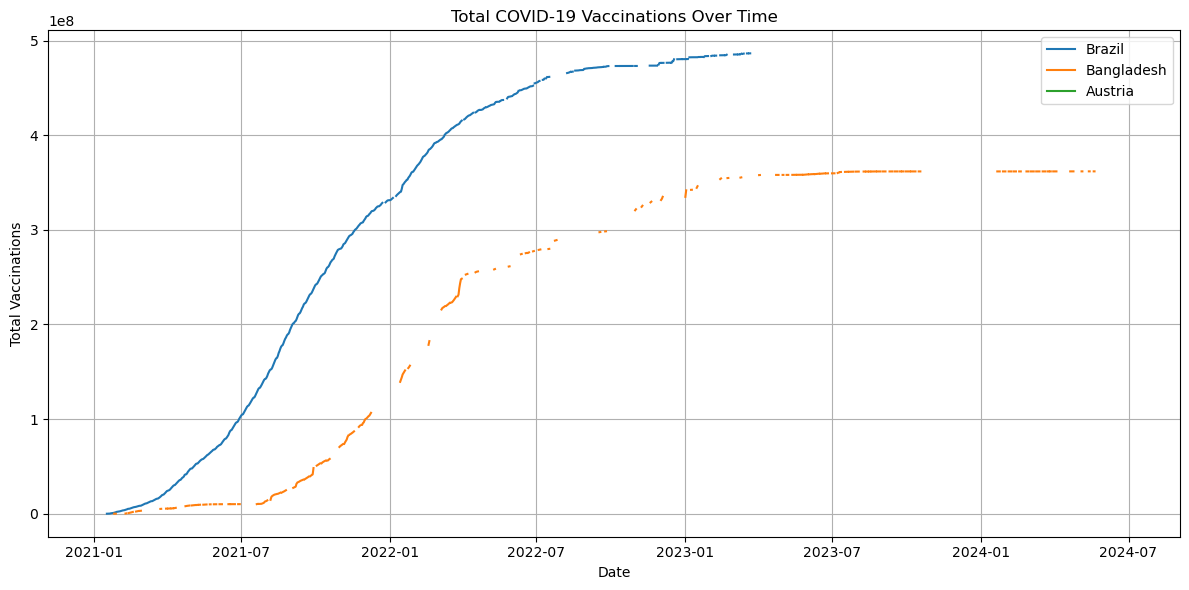

In [22]:
#Plot Cumulative Vaccinations Over Time
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = df_countries[df_countries['location'] == country]
    plt.plot(country_data['date'], country_data['total_vaccinations'], label=country)

plt.title('Total COVID-19 Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


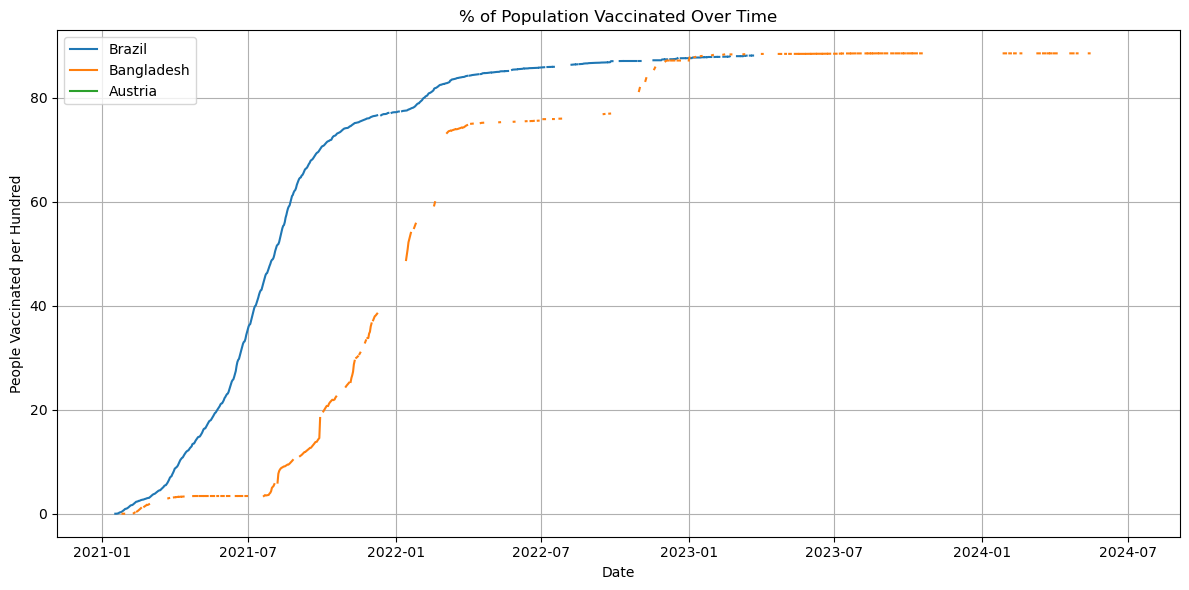

In [23]:
#Compare percentage of Population Vaccinated
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = df_countries[df_countries['location'] == country]
    plt.plot(country_data['date'], country_data['people_vaccinated_per_hundred'], label=country)

plt.title('% of Population Vaccinated Over Time')
plt.xlabel('Date')
plt.ylabel('People Vaccinated per Hundred')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [24]:
pip install plotly


Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.


In [27]:
# Get the most recent entry for each country
latest_data = df_countries.sort_values('date').groupby('location').tail(1)

# Drop rows with missing values for total_cases and people_vaccinated_per_hundred
latest_data = latest_data[['location', 'iso_code', 'total_cases', 'people_vaccinated_per_hundred']].dropna()


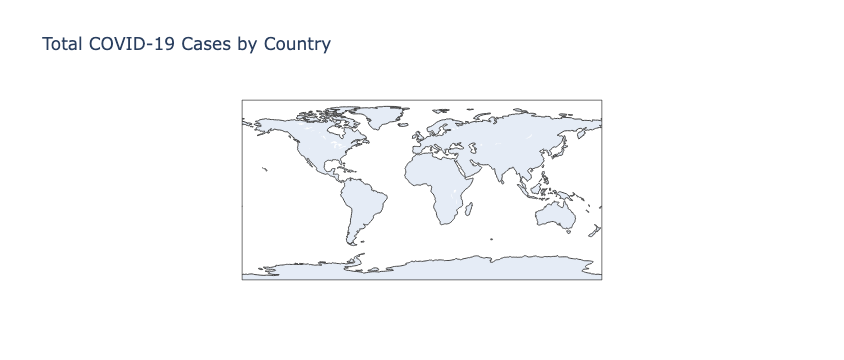

In [30]:
import plotly.express as px

fig_cases = px.choropleth(
    latest_data,
    locations="iso_code",
    color="total_cases",
    hover_name="location",
    color_continuous_scale="Reds",
    title=" Total COVID-19 Cases by Country"
)

fig_cases.show()


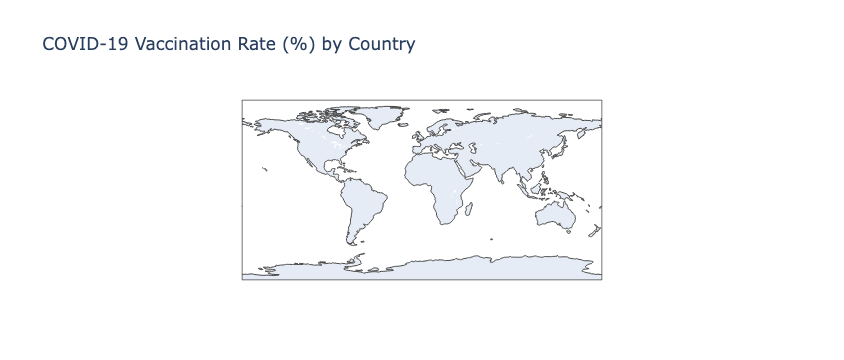

In [31]:
fig_vax = px.choropleth(
    latest_data,
    locations="iso_code",
    color="people_vaccinated_per_hundred",
    hover_name="location",
    color_continuous_scale="Greens",
    title=" COVID-19 Vaccination Rate (%) by Country"
)

fig_vax.show()


INSIGHTS:
Vaccination Rates: "As of the latest data, the US has the highest vaccination rate among major countries, with over 60% of the population fully vaccinated."

Deaths vs. Cases: "Countries like India and Brazil have high case counts but relatively lower death rates compared to other nations with similar infection numbers."

Emerging Trends: "New cases in Europe have seen a significant decline after the vaccination rollout, showcasing the effectiveness of mass vaccination efforts."

Regional Comparison: "Africa, despite a lower total number of cases, is lagging in vaccination rates compared to other continents."